# 第7章: 単語ベクトル
*単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．*

# 60. 単語ベクトルの読み込みと表示
*Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．*

In [1]:
import gensim

/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

# 61. 単語の類似度
*“United States”と”U.S.”のコサイン類似度を計算せよ．*

In [3]:
model.similarity('United_States', 'U.S.')

0.73107743

# 62. 類似度の高い単語10件
*“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．*
全300万単語

In [4]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.7400725483894348),
 ('U.S.', 0.7310773730278015),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

# 63. 加法構成性によるアナロジー
*“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．*

In [5]:
model.most_similar(positive=['Spain','Athens'], negative=['Madrid'],topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400863289833069),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791338920593)]

# 64. アナロジーデータでの実験
*単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．*

In [6]:
with open('questions-words.txt') as f:
    questions = f.readlines()
with open('64.txt','w') as f:
    for i,question in enumerate(questions):
        words = question.split()
        if len(words)==4:
            ans = model.most_similar(positive=[words[1], words[2]],  negative=[words[0]], topn=1)[0]
            words += [ans[0], str(ans[1])]
            output = ' '.join(words)+'\n'
        else:
            output = question
        f.write(output)
        if (i%100==0):
            print (i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [7]:
with open('64.txt', 'r') as no64:
    content = no64.read()
    
print(content)

: capital-common-countries
Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
Athens Greece Bangkok Thailand Thailand 0.7137669920921326
Athens Greece Beijing China China 0.7235777378082275
Athens Greece Berlin Germany Germany 0.6734622716903687
Athens Greece Bern Switzerland Switzerland 0.4919748902320862
Athens Greece Cairo Egypt Egypt 0.7527809739112854
Athens Greece Canberra Australia Australia 0.583732545375824
Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
Athens Greece Havana Cuba Cuba 0.6460990905761719
Athens Greece Helsinki Finland Finland 0.68999844789505
Athens Greece Islamabad Pakistan Pakistan 0.7233326435089111
Athens Greece Kabul Afghanistan Afghan 0.6160916090011597
Athens Greece London England Britain 0.5646187663078308
Athens Greece Madrid Spain Spain 0.7036612629890442
Athens Greece Moscow Russia Russia 0.7382973432540894
Athens Greece Oslo Norway Norway 0.6470744013786316
Athens Greece Ottawa Canada Canada 0.5912168025970459
Athens Greece Paris France Fra

# 65. アナロジータスクでの正解率
*64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．*

In [8]:
cnt = 0
ok = 0
with open('64.txt', 'r') as f:
    questions = f.readlines()
for question in questions:
    words = question.split()
    if len(words)==6:
        cnt += 1
        if (words[3]==words[4]):
            ok += 1
print(ok/cnt)

0.7358780188293083


# 66. WordSimilarity-353での評価
*The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．*

In [9]:
import pandas as pd

df = pd.read_csv('wordsim353/combined.csv')
sim = []
for i in range(len(df)):
    line = df.iloc[i]
    sim.append(model.similarity(line['Word 1'],line['Word 2']))
df['w2v'] = sim 
df[['Human (mean)', 'w2v']].corr(method='spearman')

,Human (mean),w2v
Human (mean),1.000000,0.700017
w2v,0.700017,1.000000


# 67. k-meansクラスタリング
*国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．*

In [14]:
import numpy as np
from sklearn.cluster import KMeans


CLUSTER_NUM = 5

# 国名データ：http://www.fao.org/countryprofiles/iso3list/en/
countries = pd.read_csv("nocsDataExport_20220607-224410.csv", encoding="shift-jis")
countries = countries["SHORT NAME"]


country_vecs = []
country_names = []
for country in countries:
    if country in model:
        country_vecs.append(model[country])
        country_names.append(country)

kmeans = KMeans(n_clusters=CLUSTER_NUM, random_state=0)
kmeans.fit(country_vecs)
for i in range(CLUSTER_NUM):
    cluster = np.where(kmeans.labels_ == i)[0]
    print("cluster:", i)
    print(", ".join([country_names[j] for j in cluster]))

cluster: 0
Afghanistan, Australia, Bahrain, Bangladesh, Bhutan, Cambodia, China, Egypt, India, Indonesia, Iraq, Israel, Japan, Jordan, Kuwait, Kyrgyzstan, Lebanon, Malaysia, Maldives, Mongolia, Myanmar, Nepal, Oman, Pakistan, Palestine, Qatar, Singapore, Tajikistan, Thailand, Turkmenistan, Uzbekistan
cluster: 1
Argentina, Brazil, Canada, Chile, Colombia, Cuba, Ecuador, Guatemala, Haiti, Honduras, Mexico, Nicaragua, Panama, Paraguay, Peru, Portugal, Spain, Suriname, Uruguay
cluster: 2
Algeria, Angola, Benin, Botswana, Burundi, Cameroon, Chad, Djibouti, Eritrea, Ethiopia, Gabon, Ghana, Guinea, Kenya, Lesotho, Liberia, Libya, Madagascar, Malawi, Mali, Mauritania, Morocco, Mozambique, Namibia, Nigeria, Rwanda, Senegal, Somalia, Togo, Tunisia, Uganda, Yemen, Zambia, Zimbabwe
cluster: 3
Albania, Andorra, Armenia, Austria, Azerbaijan, Belarus, Belgium, Bulgaria, Croatia, Cyprus, Czechia, Denmark, Estonia, Finland, France, Georgia, Germany, Greece, Hungary, Iceland, Ireland, Italy, Kazakhstan,

# 68. Ward法によるクラスタリング
*国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．*

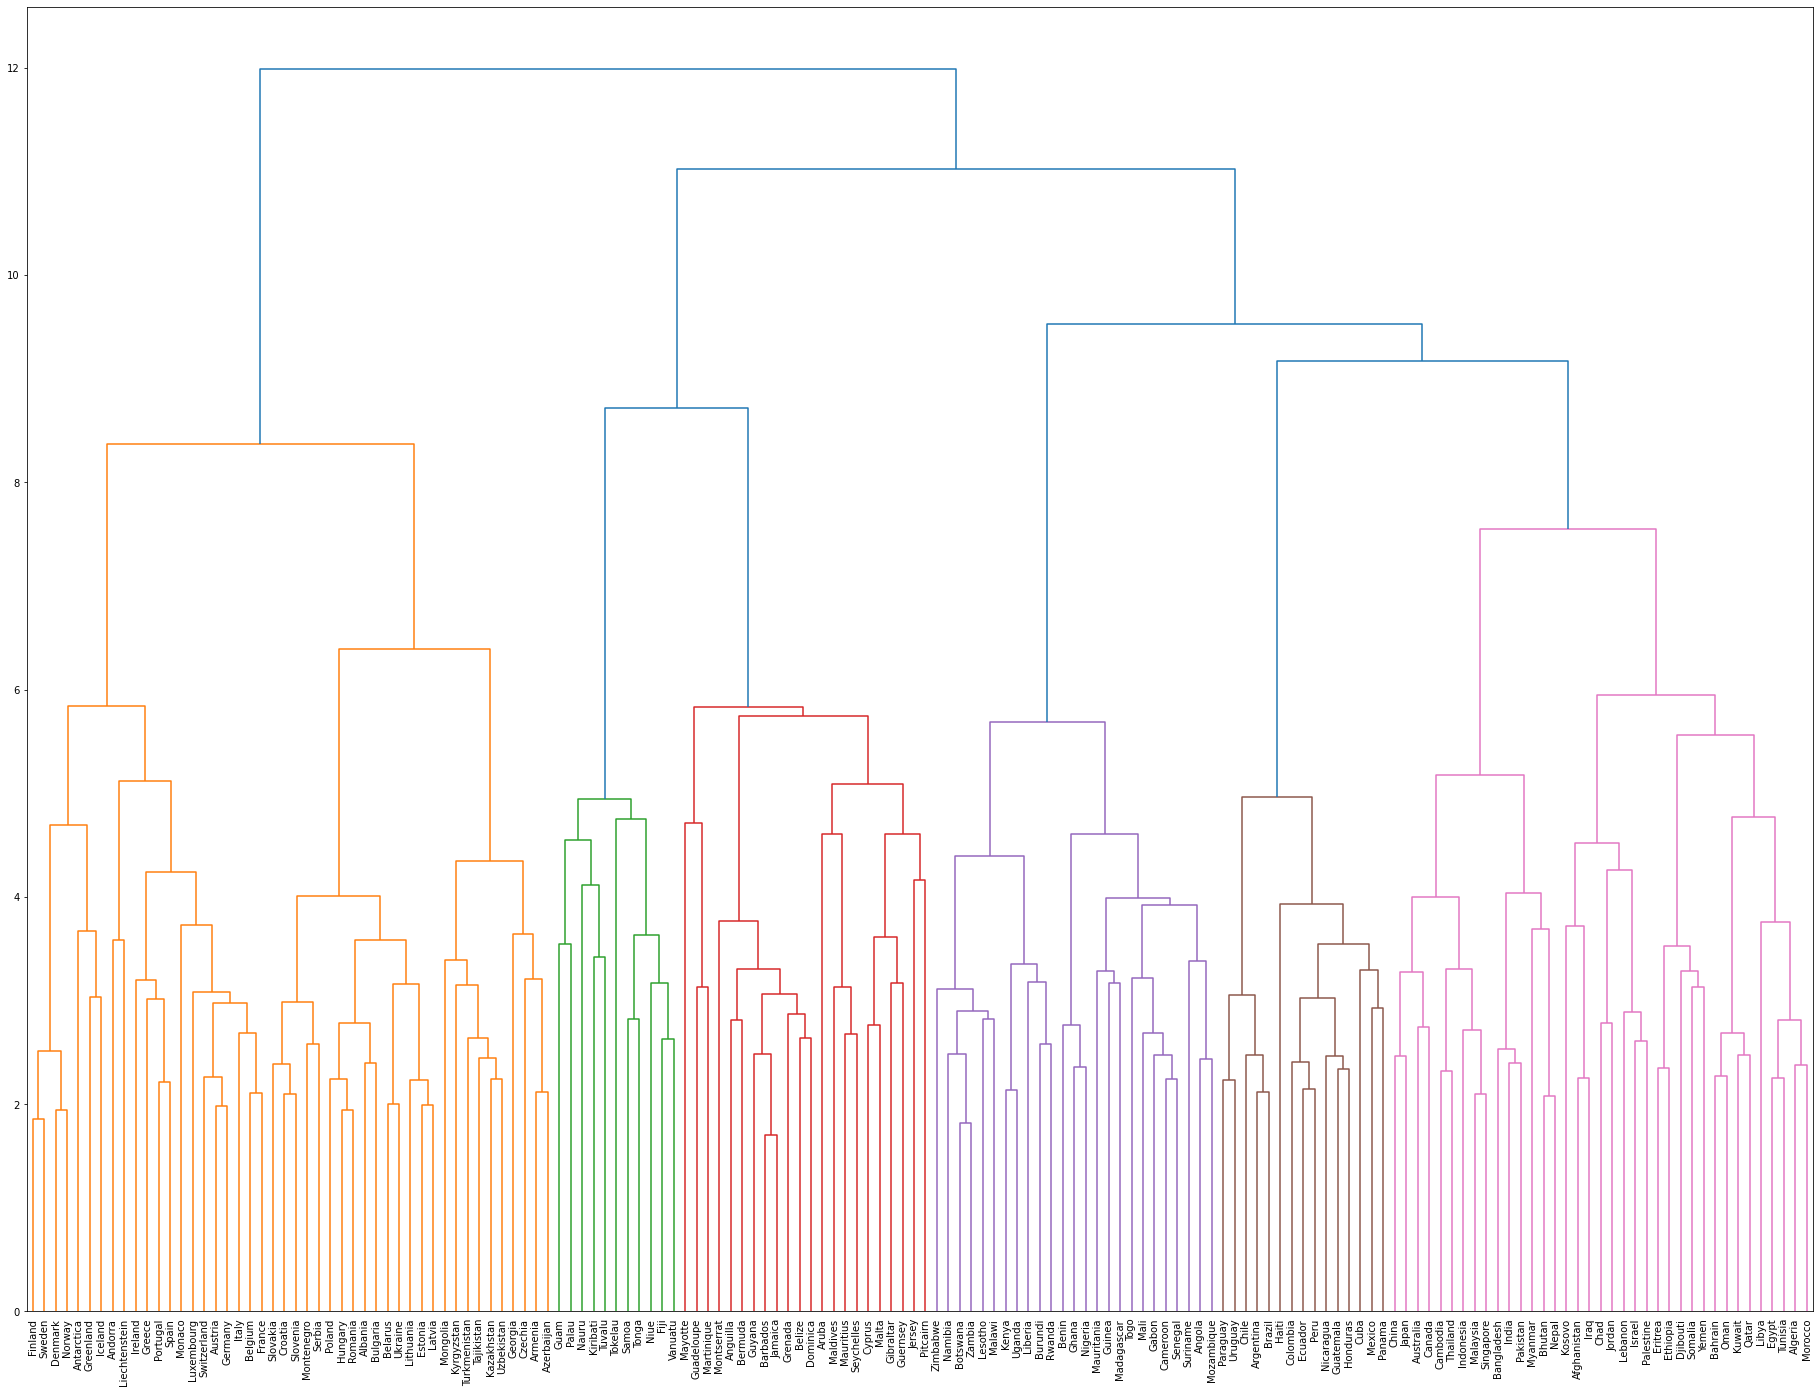

In [17]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(32.0, 24.0))
link = linkage(country_vecs, method='ward')
dendrogram(link, labels=country_names,leaf_rotation=90,leaf_font_size=10)
plt.show()

# 69. t-SNEによる可視化
*国名に関する単語ベクトルのベクトル空間をt-SNEで可視化せよ．*

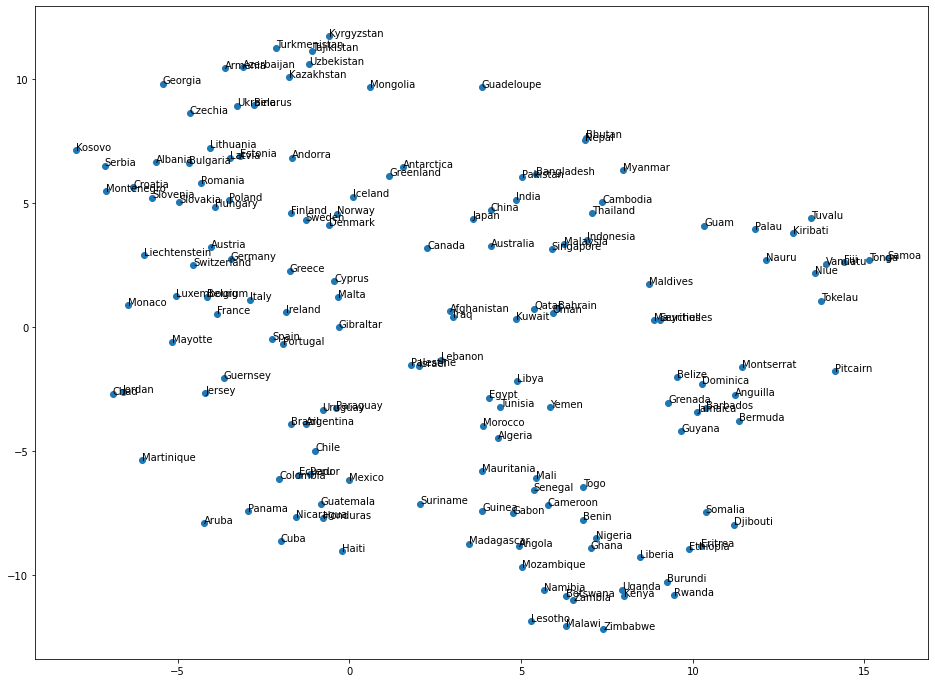

In [18]:
from sklearn.manifold import TSNE
vec_embedded = TSNE(n_components=2).fit_transform(country_vecs)
vec_embedded_t = list(zip(*vec_embedded)) # 転置
fig, ax = plt.subplots(figsize=(16, 12))
plt.scatter(*vec_embedded_t)
for i, c in enumerate(country_names):
    ax.annotate(c, (vec_embedded[i][0],vec_embedded[i][1]))